# Henkes _et al._, Nat. Comm. (2020)

[__DOI:__ 10.1038/s41467-020-15164-5](https://doi.org/10.1038/s41467-020-15164-5)

In [1]:
from coll_dyn_activem.plot import list_colormap

In [2]:
_mu = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5]
colors = list_colormap(_mu, colormap='jet', sort=True)
D = 1
Dr = 5e-2

## Mean squared velocity

$$
\xi_L = \bar{\sigma} \sqrt{D_r^{-1} (B + \mu)}
$$
$$
\xi_T = \bar{\sigma} \sqrt{D_r^{-1} \mu}
$$

In [3]:
def xiL(Dr=5e-2, mu=0.5):
    """
    Longitudinal correlation length (Eq. 10).
    Assumes B + \\mu = 4.3\\mu.
    """
    
    return sqrt((4.3*mu)/Dr)

def xiT(Dr=5e-2, mu=0.5):
    """
    Transverse correlation length (Eq. 10).
    """

    return sqrt(mu/Dr)

$$\left<|\dot{\boldsymbol{r}}_i(t)|^2\right> = \frac{D D_r}{4\pi} \left[\frac{1}{(\xi_L/\bar{\sigma})^2} \log\left((2\pi\xi_L/\bar{\sigma})^2 + 1\right) + \frac{1}{(\xi_T/\bar{\sigma})^2} \log\left((2\pi\xi_T/\bar{\sigma})^2 + 1\right)\right]$$

In [4]:
def v2(D=1, Dr=5e-2, mu=0.5):
    """
    Mean squared velocity (Eq. 11).
    Assumes B + \\mu = 4.3\\mu.
    """
    
    return ((D*Dr)/(4*gp(pi)))*(
        ln((2*gp(pi)*xiL(Dr=Dr, mu=mu))^2 + 1)/(xiL(Dr=Dr, mu=mu)^2)
        + ln((2*gp(pi)*xiT(Dr=Dr, mu=mu))^2 + 1)/(xiT(Dr=Dr, mu=mu)^2))

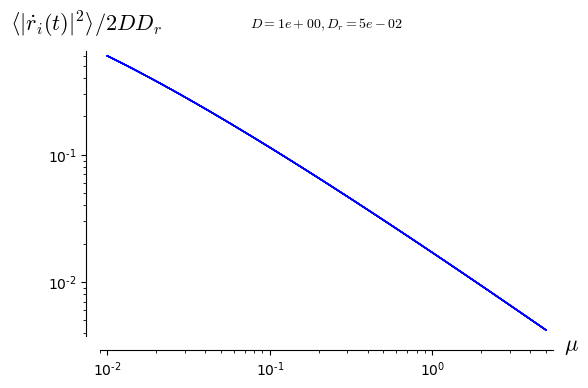

In [5]:
pv = [plot(lambda mu: v2(D=D, Dr=Dr, mu=mu)/(2*D*Dr),
    (min(_mu), max(_mu)),
    scale='loglog',
    axes_labels=[
        r'$\mu$',
        r'$\left<|\dot{r}_i(t)|^2\right>/2 D D_r$'],
    title=r'$D=%.0e, D_r=%.0e$' % (D, Dr))
    for mu in _mu]
sum(pv)

In [6]:
sum(pv).save("henkes_natcomm_2020_eq11.eps")
sum(pv).save("henkes_natcomm_2020_eq11.svg")

In [7]:
cvvt0 = {mu: v2(D=D, Dr=Dr, mu=mu) for mu in _mu}

## Autocorrelation of velocity (time)

$$
\left<\dot{\boldsymbol{r}}_i(t) \cdot \dot{\boldsymbol{r}}_i(t^{\prime})\right> = \frac{D D_r^2}{2 \pi} \int_0^{2\pi} \mathrm{d}q \, q \, \left[\frac{(B + \mu) q^2 e^{-(B + \mu) q^2 |t - t^{\prime}|} - D_r e^{-D_r |t - t^{\prime}|}}{(B + \mu)^2 q^4 - D_r^2} + \frac{\mu q^2 e^{-\mu q^2 |t - t^{\prime}|} - D_r e^{-D_r |t - t^{\prime}|}}{\mu^2 q^4 - D_r^2}\right]
$$

In [8]:
def cvvt(t0, t1, D=1, Dr=5e-2, mu=0.5):
    """
    Temporal autocorrelation function of the velocity field (SM, Eq. 57).
    Assumes B + \\mu = 4.3 \\mu.
    """
    
    t = abs(t0 - t1)

    return ((D*(Dr^2))/(2.0*gp(pi)))*numerical_integral(
        lambda q: q*(
            ((4.3*mu*(q^2)*exp(-4.3*mu*(q^2)*t) - Dr*exp(-Dr*t))
                /(((4.3*mu)^2)*(q^4) - Dr^2))
            + ((mu*(q^2)*exp(-mu*(q^2)*t) - Dr*exp(-Dr*t))
                /((mu^2)*(q^4) - Dr^2))),
        0.0, 2*pi)[0]

/usr/local/miniconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3157: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


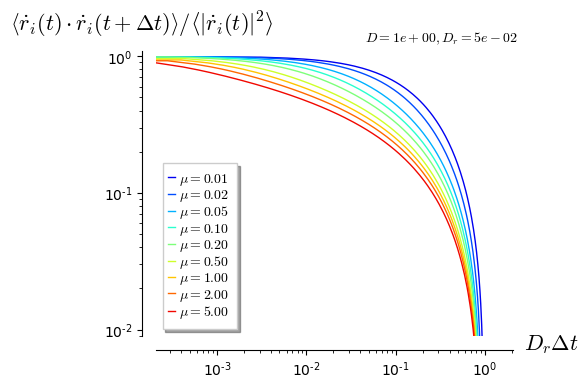

In [9]:
pt = [plot(lambda t: cvvt(0, t/Dr, D=D, Dr=Dr, mu=mu)/cvvt0[mu],
    (0, 2),
    scale='loglog', xmin=1e-2, xmax=2, ymin=1e-2, ymax=1e0,
    rgbcolor=colors[mu][:-1], legend_label=r'$\mu=%.2f$' % mu,
    axes_labels=[
        r'$D_r \Delta t$',
        r'$\left<\dot{r}_i(t) \cdot \dot{r}_i(t + \Delta t)\right>$'
            + r'$/\left<|\dot{r}_i(t)|^2\right>$'],
    title=r'$D=%.0e, D_r=%.0e$' % (D, Dr), title_pos=(0.8, 1.00))
    for mu in _mu]
sum(pt)

In [10]:
sum(pt).save("henkes_natcomm_2020_eq57.eps")
sum(pt).save("henkes_natcomm_2020_eq57.svg")

/usr/local/miniconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3157: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


## Mean squared displacement

$$
\left<|\Delta \boldsymbol{r}_i(t, t + \Delta t)|^2\right> = \frac{D D_r^2}{\pi} \int_0^{2\pi} \mathrm{d}q \, q \, \left[\frac{\left[(B + \mu) q^2\right]^{-1} (e^{-(B + \mu) q^2 \Delta t} - 1) - D_r^{-1} (e^{-D_r \Delta t} - 1)}{(B + \mu)^2 q^4 - D_r^2} + \frac{(\mu q^2)^{-1} (e^{-\mu q^2 \Delta t} - 1) - D_r^{-1} (e^{-D_r \Delta t} - 1)}{\mu^2 q^4 - D_r^2}\right]
$$

In [11]:
def msd(dt, D=1, Dr=5e-2, mu=0.5):
    """
    Mean squared displacement from double integration of the
    autocorrelation function of the velocity field (SM, Eq. 57).
    Assumes B + \\mu = 4.3 \\mu.
    """
    
    return ((D*(Dr^2))/gp(pi))*numerical_integral(
        lambda q: q*(
            ((((4.3*mu*(q^2))^(-1))*(exp(-4.3*mu*(q^2)*dt) - 1)
                - (Dr^(-1))*(exp(-Dr*dt) - 1))
                    /(((4.3*mu)^2)*(q^4) - Dr^2))
            + ((((mu*(q^2))^(-1))*(exp(-mu*(q^2)*dt) - 1)
                - (Dr^(-1))*(exp(-Dr*dt) - 1))
                    /((mu^2)*(q^4) - Dr^2))),
        0.0, 2*pi)[0]

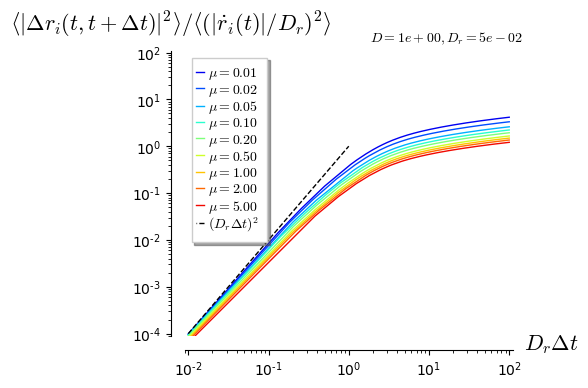

In [12]:
pm = [plot(lambda t: msd(t/Dr, D=D, Dr=Dr, mu=mu)/(cvvt0[mu]/(Dr^2)),
    (1e-2, 1e2),
    scale='loglog', xmin=1e-2, xmax=1e2, ymin=1e-4, ymax=1e2,
    rgbcolor=colors[mu][:-1], legend_label=r'$\mu=%.2f$' % mu,
    axes_labels=[
        r'$D_r \Delta t$',
        r'$\left<|\Delta r_i(t, t + \Delta t)|^2\right>$'
            + r'$/\left<(|\dot{r}_i(t)|/D_r)^2\right>$'],
    title=r'$D=%.0e, D_r=%.0e$' % (D, Dr), title_pos=(0.8, 1.00))
    for mu in _mu]
pm += [plot(lambda x: x^2, (1e-2, 1e0), color='black', linestyle='--',
           legend_label=r'$(D_r \Delta t)^2$')]
sum(pm)

In [13]:
sum(pm).save("henkes_natcomm_2020_eq57_msd.eps")
sum(pm).save("henkes_natcomm_2020_eq57_msd.svg")

## Autocorrelation of velocity (space)

$$
\left<\dot{\boldsymbol{r}}(\boldsymbol{r}) \cdot \dot{\boldsymbol{r}}(\boldsymbol{r} + \Delta\boldsymbol{r})\right> = \frac{D D_r}{2 \pi} \left[\frac{K_0(\Delta r/\xi_L)}{(\xi_L/\bar{\sigma})^2} + \frac{K_0(\Delta r/\xi_T)}{(\xi_T/\bar{\sigma})^2}\right]\\
$$

In [14]:
def cvvr(r, D=1, Dr=5e-2, mu=0.5):
    """
    Radial autocorrelation function of the velocity field (SM, Eq. 62).
    Assumes B + \\mu = 4.3 \\mu.
    """
    
    xiL = sqrt((4.3*mu)/Dr)
    xiT = sqrt(mu/Dr)
    
    return ((D*Dr)/(2.0*gp(pi)))*(
        bessel_K(0, r/xiL)/(xiL^2) + bessel_K(0, r/xiT)/(xiT^2))

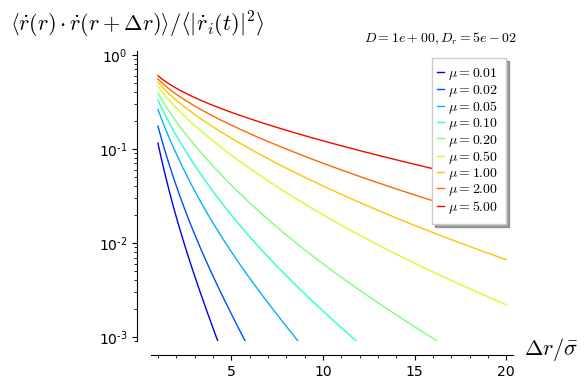

In [15]:
pr = [plot(lambda r: cvvr(r, D=D, Dr=Dr, mu=mu)/cvvt0[mu],
    (1, 20),
    scale='semilogy', xmin=0, xmax=20, ymin=1e-3, ymax=1e0,
    rgbcolor=colors[mu][:-1], legend_label=r'$\mu=%.2f$' % mu,
    axes_labels=[
        r'$\Delta r/\bar{\sigma}$',
        r'$\left<\dot{r}(r) \cdot \dot{r}(r + \Delta r)\right>$'
            + r'$/\left<|\dot{r}_i(t)|^2\right>$'],
    title=r'$D=%.0e, D_r=%.0e$' % (D, Dr), title_pos=(0.8, 1.00))
    for mu in _mu]
sum(pr)

In [16]:
sum(pr).save("henkes_natcomm_2020_eq62.eps")
sum(pr).save("henkes_natcomm_2020_eq62.svg")

## Autocorrelation of force (space)

$$
\left<\boldsymbol{F}(\boldsymbol{r}) \cdot \boldsymbol{F}(\boldsymbol{r} + \Delta\boldsymbol{r})\right> = - \frac{D D_r}{4 \pi} \left[\frac{1}{(\xi_L/\bar{\sigma})^2}(K_0(\Delta r/\xi_L) + K_2(\Delta r/\xi_L)) + \frac{1}{(\xi_T/\bar{\sigma})^2} (K_0(\Delta r/\xi_T) + K_2(\Delta r/\xi_T))\right]\\
$$

In [17]:
def cffr(r, D=1, Dr=5e-2, mu=0.5):
    """
    Radial autocorrelation function of the velocity field (SM, Eq. 62).
    Assumes B + \\mu = 4.3 \\mu.
    """
    
    xiL = sqrt((4.3*mu)/Dr)
    xiT = sqrt(mu/Dr)
    
    return -((D*Dr)/(4.0*gp(pi)))*(
        (bessel_K(0, r/xiL) + bessel_K(2, r/xiL))/(xiL^2)
        + (bessel_K(0, r/xiT) + bessel_K(2, r/xiT))/(xiT^2))

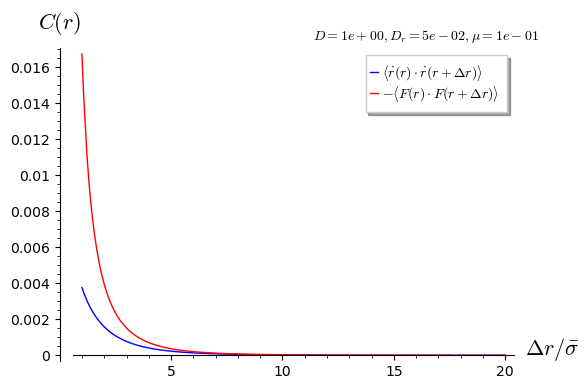

In [18]:
mu = 1e-1
pf = [
    plot(lambda r: cvvr(r, D=D, Dr=Dr, mu=mu), (1, 20),
        color='blue', legend_label=r'$\left<\dot{r}(r) \cdot \dot{r}(r + \Delta r)\right>$',
        axes_labels=[
            r'$\Delta r/\bar{\sigma}$',
            r'$C(r)$'],
        title=r'$D=%.0e, D_r=%.0e, \mu=%.0e$' % (D, Dr, mu), title_pos=(0.8, 1.00)),
    plot(lambda r: -cffr(r, D=D, Dr=Dr, mu=mu), (1, 20),
        color='red', legend_label=r'$-\left<F(r) \cdot F(r + \Delta r)\right>$')]
sum(pf)

In [19]:
sum(pf).save("henkes_natcomm_2020_cff.eps")
sum(pf).save("henkes_natcomm_2020_cff.svg")